In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file into a Pandas DataFrame
file_path = "C:\\Users\\douaa\\OneDrive\\Desktop\\downtest\\NEWlistings.csv"
airbnb_df = pd.read_csv(file_path)
airbnb_df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,50904,Boutique hotel in Antwerp · ★5.0 · 1 bedroom ·...,234077,Karin,NaN,Historisch Centrum,51.218575,4.398631,Hotel room,188.0,1,3,5/15/2022,0.03,4,340,0,NaN
1,224682,Rental unit in Antwerpen · ★4.79 · 1 bedroom ·...,1263933,Kristien,NaN,Historisch Centrum,51.219060,4.399550,Entire home/apt,167.0,2,536,12/17/2023,3.71,2,0,87,NaN
2,345959,Rental unit in Antwerp · ★4.81 · 2 bedrooms · ...,1754396,Marleen,NaN,Markgrave,51.201500,4.400040,Entire home/apt,66.0,3,100,12/17/2023,0.71,2,295,16,NaN


In [128]:
missing_values = airbnb_df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
id                                   0
name                                 0
host_id                              0
host_name                            3
neighbourhood_group               2815
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                              285
minimum_nights                       0
number_of_reviews                    0
last_review                        471
reviews_per_month                  471
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           2815
dtype: int64


In [129]:
cleaned_airbnb_df = airbnb_df.drop(['neighbourhood_group'], axis=1)

In [130]:
cleaned_airbnb_df.head(1)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,50904,Boutique hotel in Antwerp · ★5.0 · 1 bedroom ·...,234077,Karin,Historisch Centrum,51.218575,4.398631,Hotel room,188.0,1,3,5/15/2022,0.03,4,340,0,NaN


In [131]:
missing_values = cleaned_airbnb_df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
id                                   0
name                                 0
host_id                              0
host_name                            3
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                              285
minimum_nights                       0
number_of_reviews                    0
last_review                        471
reviews_per_month                  471
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           2815
dtype: int64


In [132]:
summary_stats = cleaned_airbnb_df.describe()
print("\nSummary Statistics:")
print(summary_stats)


Summary Statistics:
                 id       host_id     latitude    longitude        price  \
count  2.815000e+03  2.815000e+03  2815.000000  2815.000000  2530.000000   
mean   4.739246e+17  2.034717e+08    51.214739     4.412889   141.595257   
std    4.280195e+17  1.805147e+08     0.013702     0.018937   254.172746   
min    5.090400e+04  2.318060e+05    51.154816     4.321049    17.000000   
25%    4.062844e+07  3.900168e+07    51.208295     4.400130    71.000000   
50%    6.412251e+17  1.624279e+08    51.217140     4.409940    99.000000   
75%    8.881534e+17  3.687807e+08    51.221305     4.423968   150.000000   
max    1.053619e+18  5.515126e+08    51.348090     4.484880  9000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count     2815.000000        2815.000000        2344.000000   
mean         6.300888          36.554885           1.680593   
std         22.600940          66.119583           1.747346   
min          1.000000           0.000000  

<Figure size 2000x2000 with 0 Axes>

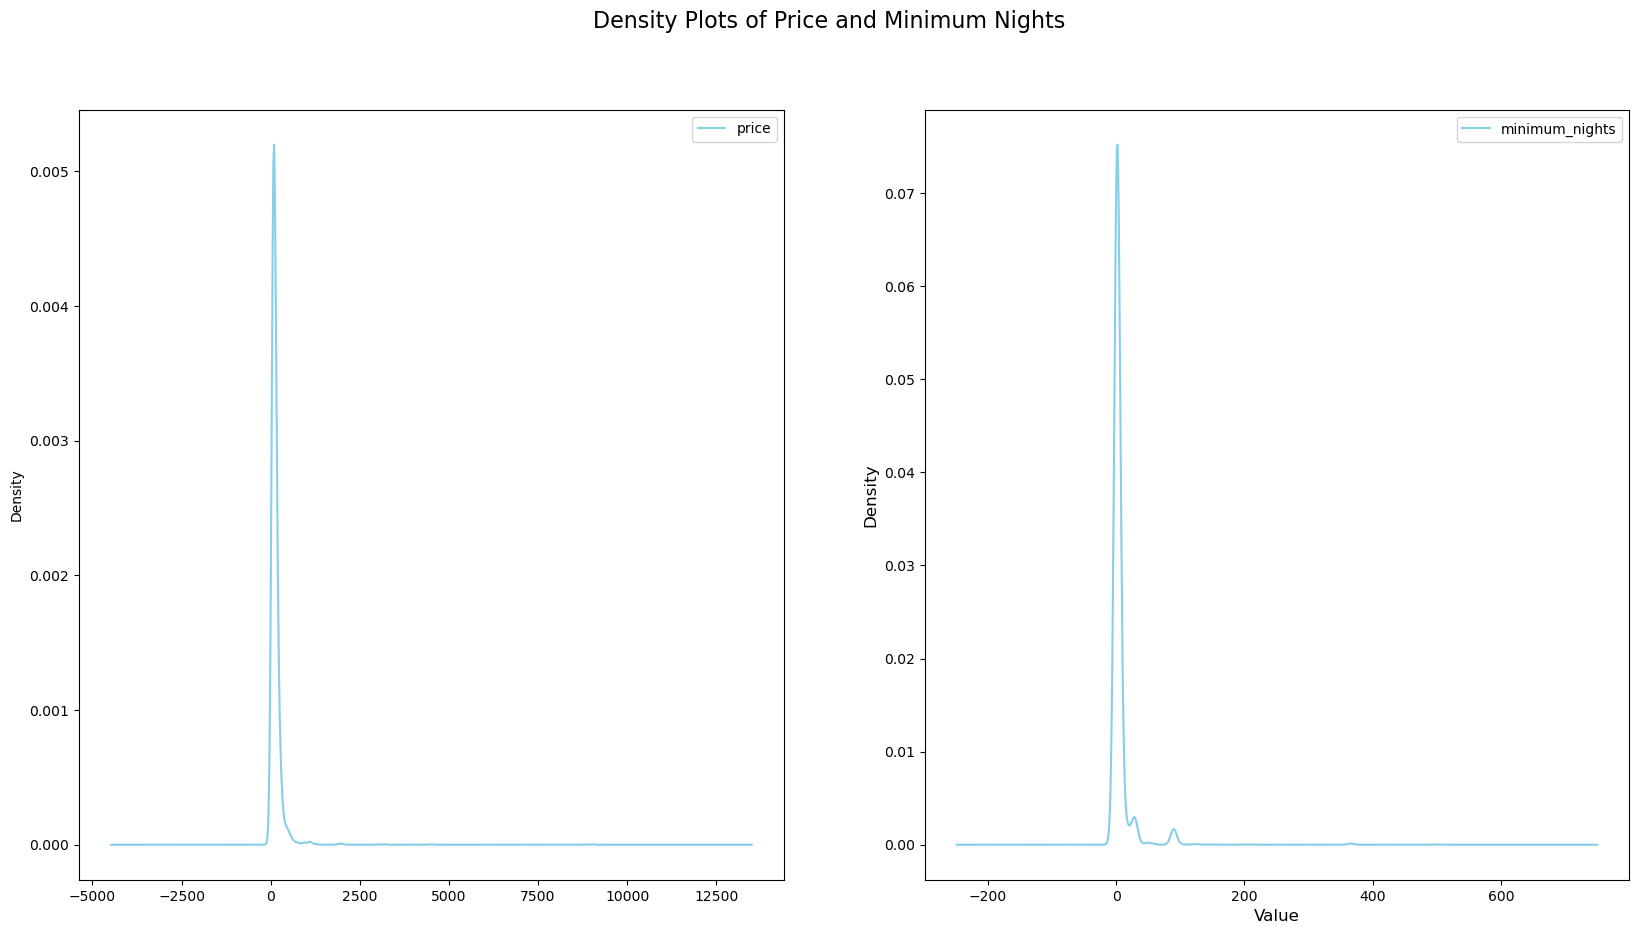

In [133]:
# Define the features to plot
features = ['price', 'minimum_nights']

# Plot density plots for the selected features
plt.figure(figsize=(20, 20))
cleaned_airbnb_df[features].plot(kind='density', subplots=True, layout=(1, 2), sharex=False, figsize=(20,10),color='skyblue')
plt.suptitle('Density Plots of Price and Minimum Nights', fontsize=16)
plt.xlabel('Value', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()

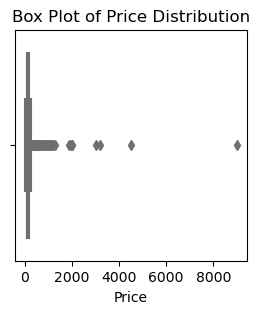

In [134]:
# Box plot of price distribution
plt.figure(figsize=(3, 3))
sns.boxplot(x=cleaned_airbnb_df['price'], color='skyblue')
plt.title('Box Plot of Price Distribution')
plt.xlabel('Price')
plt.show()


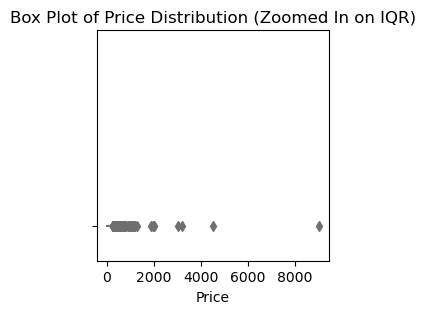

In [135]:
# Set the range of the y-axis to focus on the IQR 
Q1 = cleaned_airbnb_df['price'].quantile(0.25)
Q3 = cleaned_airbnb_df['price'].quantile(0.75)
IQR = Q3 - Q1

plt.figure(figsize=(3, 3))
sns.boxplot(x=cleaned_airbnb_df['price'], color='skyblue')
plt.ylim(Q1 - 1.5 * IQR, Q3 + 1.5 * IQR)  # Adjust the range based on the IQR
plt.title('Box Plot of Price Distribution (Zoomed In on IQR)')
plt.xlabel('Price')
plt.show()

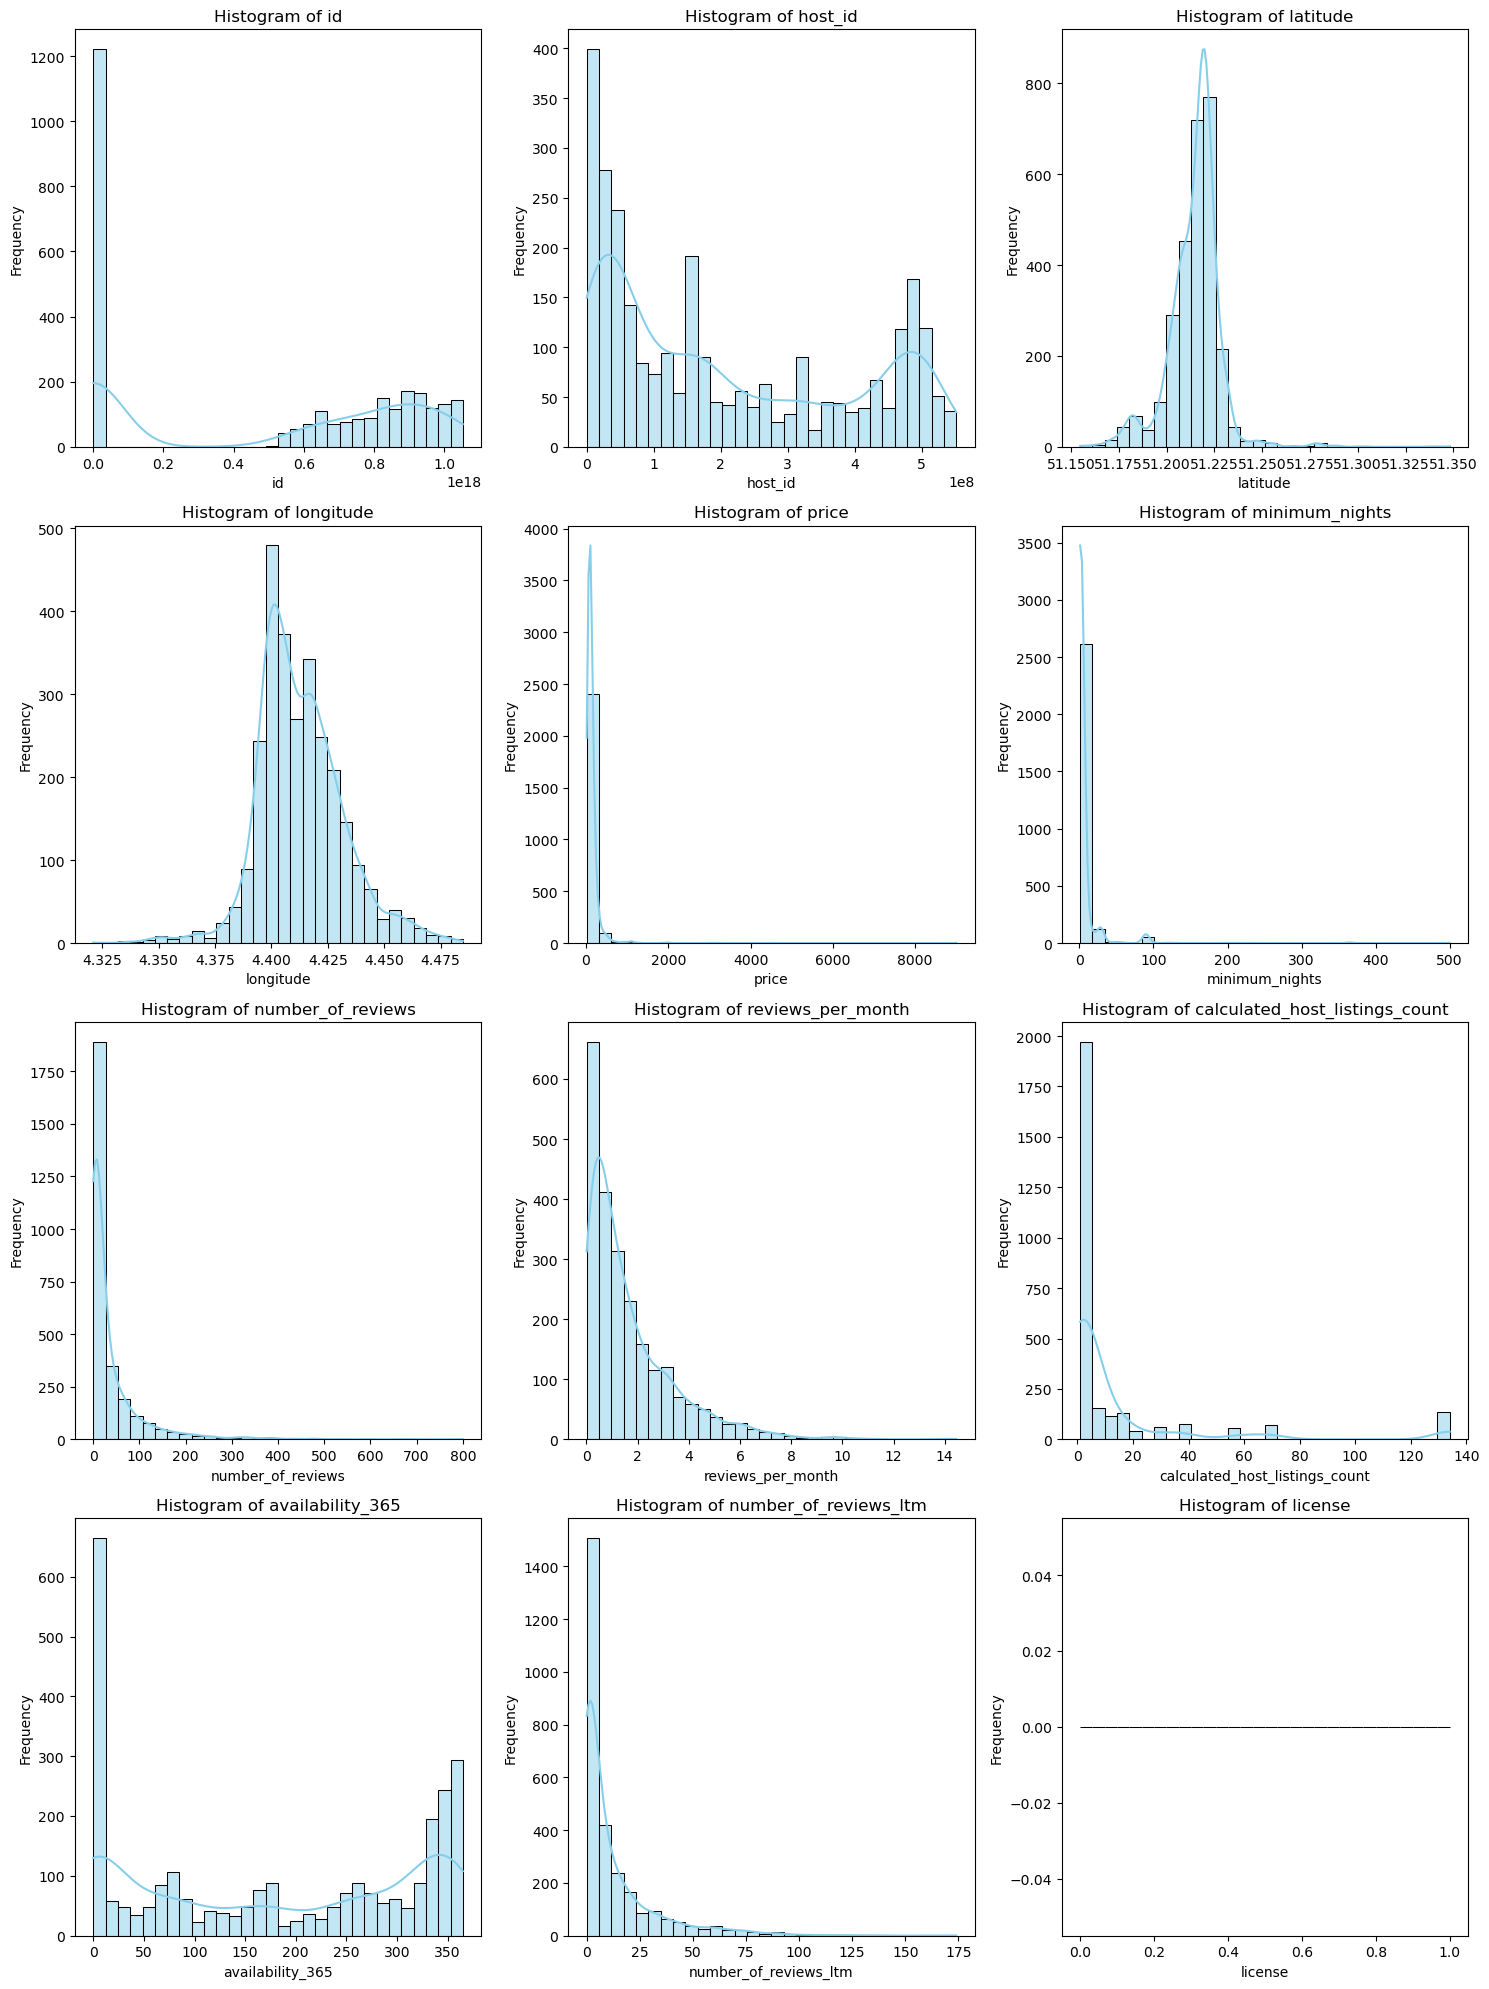

In [136]:
# Histograms for numerical variables
numerical_cols = cleaned_airbnb_df.select_dtypes(include='number').columns.tolist()
num_plots = len(numerical_cols)
num_rows = (num_plots + 2) // 3  # Calculate the number of rows needed for subplots

plt.figure(figsize=(15, 5 * num_rows))  # Adjust the figure size based on the number of rows
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(num_rows, min(num_plots, 3), i)  # Limit the number of columns to 3
    sns.histplot(cleaned_airbnb_df[col], bins=30, kde=True, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

C:\Users\douaa\AppData\Local\Temp\ipykernel_992\4133435274.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(cleaned_airbnb_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")


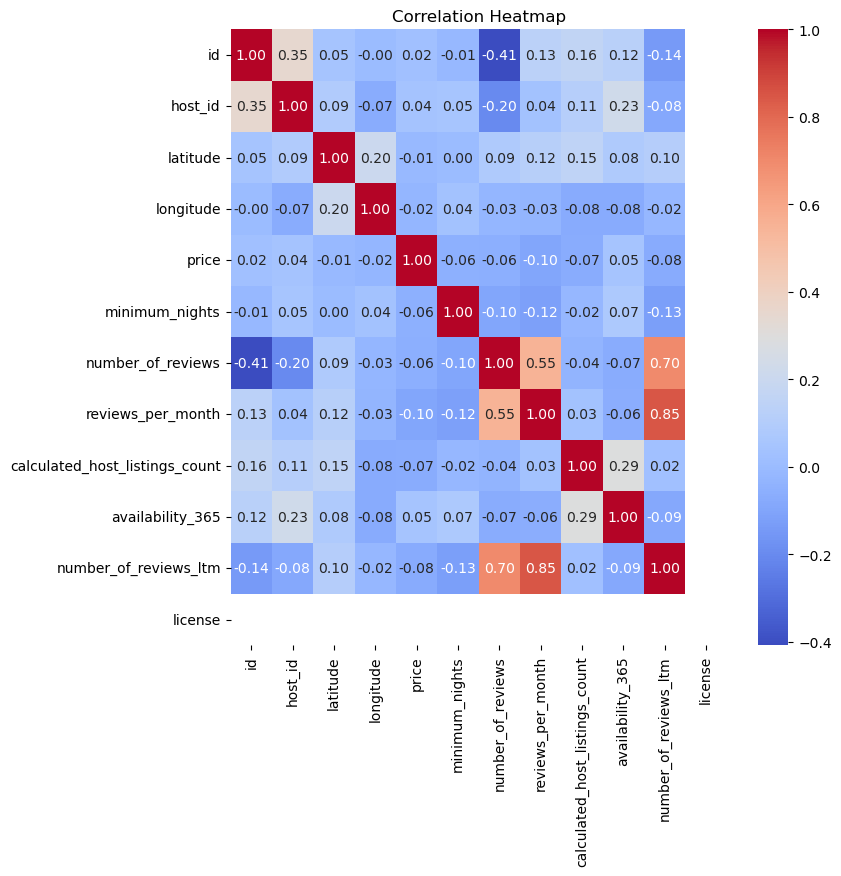

In [137]:
# Correlation heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(cleaned_airbnb_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [138]:
cleaned_airbnb_df=airbnb_df.drop(['reviews_per_month', 'number_of_reviews_ltm'], axis =1)

C:\Users\douaa\AppData\Local\Temp\ipykernel_992\4133435274.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(cleaned_airbnb_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")


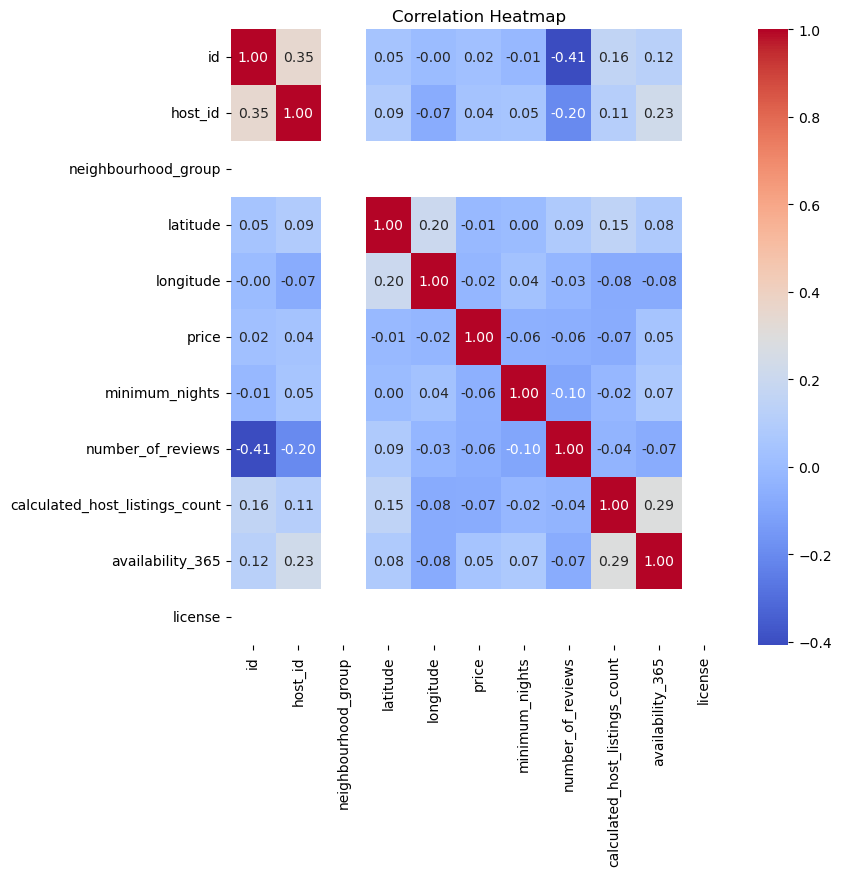

In [139]:
# Correlation heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(cleaned_airbnb_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

<Figure size 10000x2000 with 0 Axes>

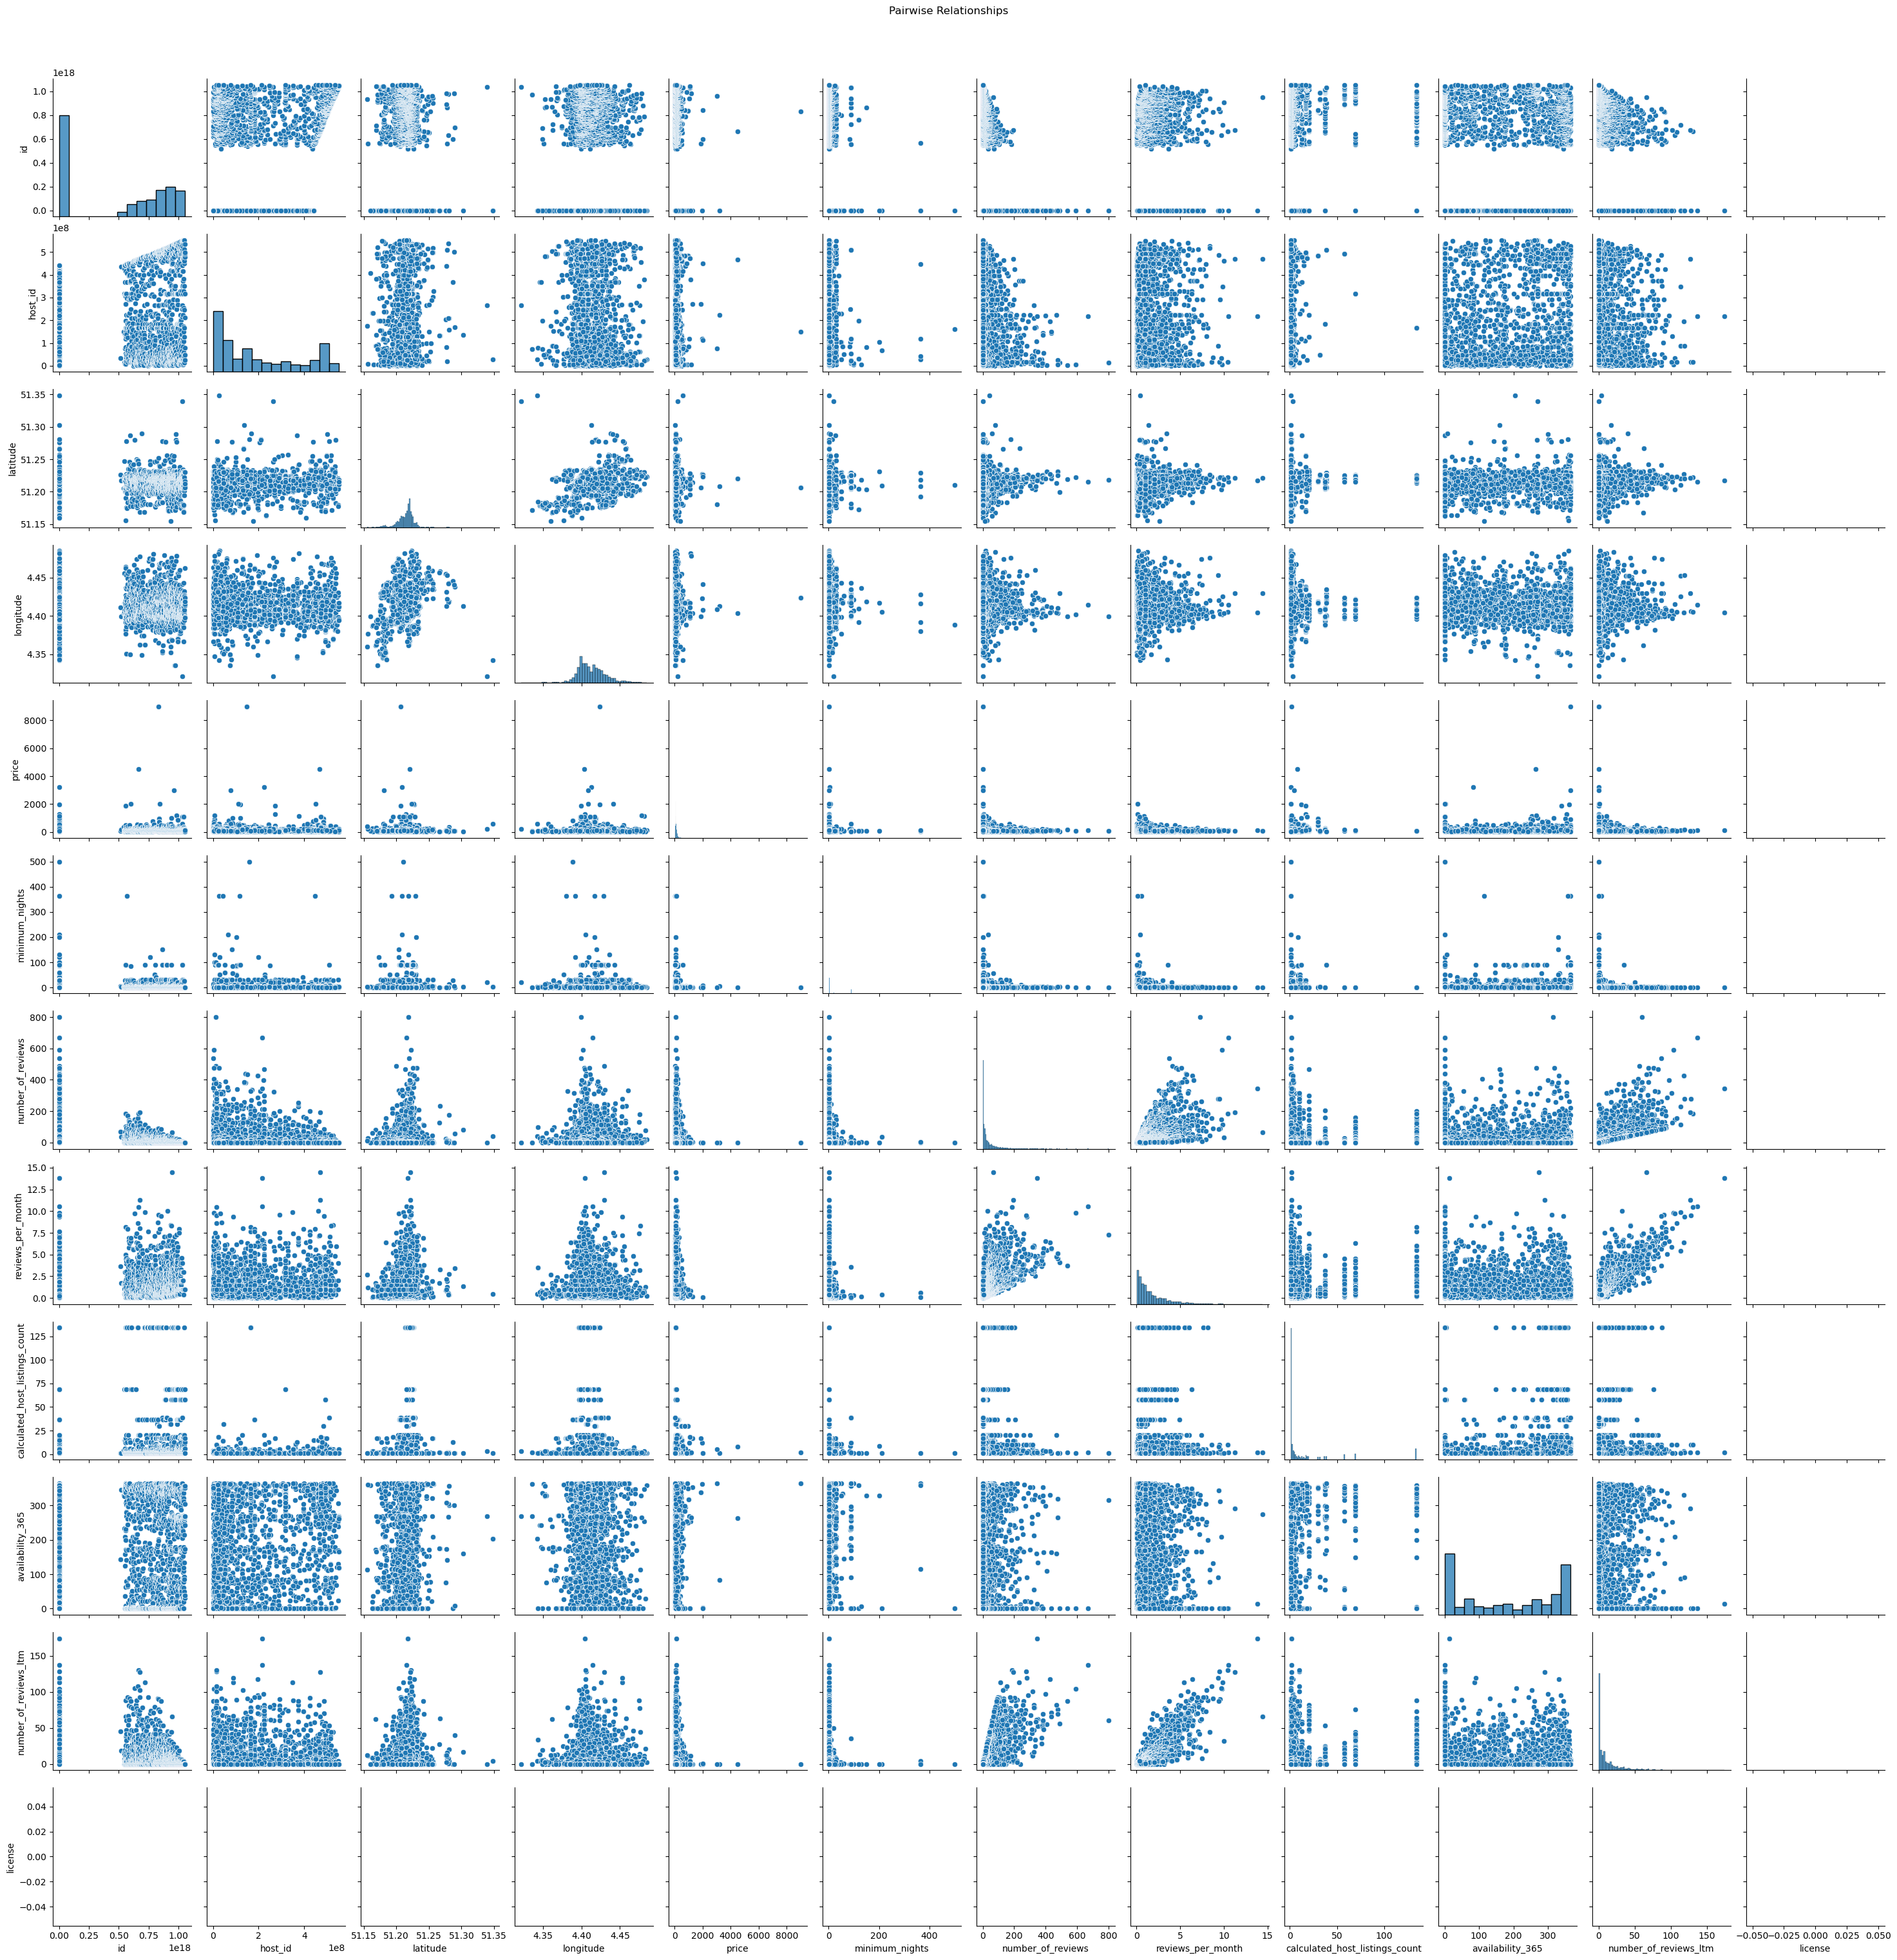

In [148]:
# Pairplot for pairwise relationships
plt.figure(figsize=(100, 20))
sns.pairplot(airbnb_df[numerical_cols])
plt.suptitle('Pairwise Relationships', y=1.02)
plt.show()

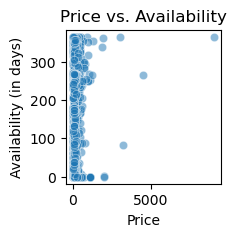

In [142]:
#  Visualize the relationship between price and availability
plt.figure(figsize=(2, 2))
sns.scatterplot(x='price', y='availability_365', data=airbnb_df, alpha=0.5)
plt.title('Price vs. Availability')
plt.xlabel('Price')
plt.ylabel('Availability (in days)')
plt.show()

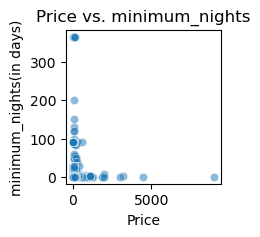

In [143]:
# Visualize the relationship between price and minimum_nights
plt.figure(figsize=(2, 2))
sns.scatterplot(x='price', y='minimum_nights', data=airbnb_df, alpha=0.5)
plt.title('Price vs. minimum_nights')
plt.xlabel('Price')
plt.ylabel('minimum_nights(in days)')
plt.show()

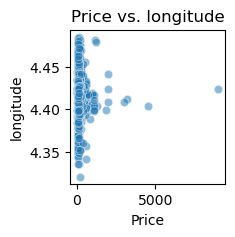

In [144]:


# Visualize the relationship between price and longitude 
plt.figure(figsize=(2, 2))
sns.scatterplot(x='price', y='longitude', data=airbnb_df, alpha=0.5)
plt.title('Price vs. longitude')
plt.xlabel('Price')
plt.ylabel('longitude')
plt.show()

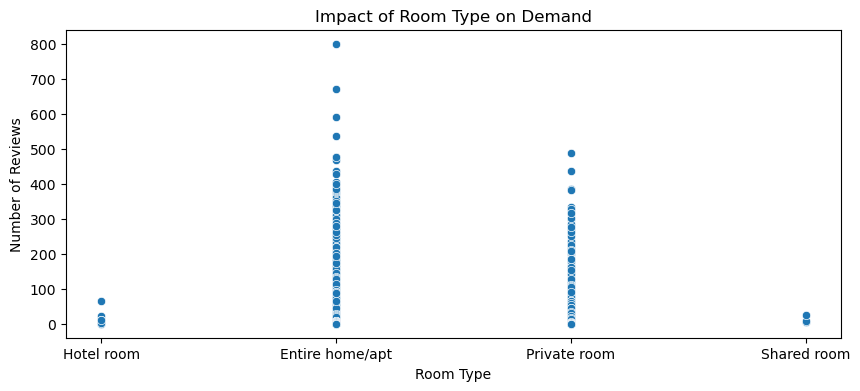

In [172]:
# Explore the impact of room type on demand (number of reviews)
plt.figure(figsize=(10, 4))
sns.scatterplot(x='room_type', y='number_of_reviews', data=airbnb_df)
plt.title('Impact of Room Type on Demand')
plt.xlabel('Room Type')
plt.ylabel('Number of Reviews')
plt.show() 





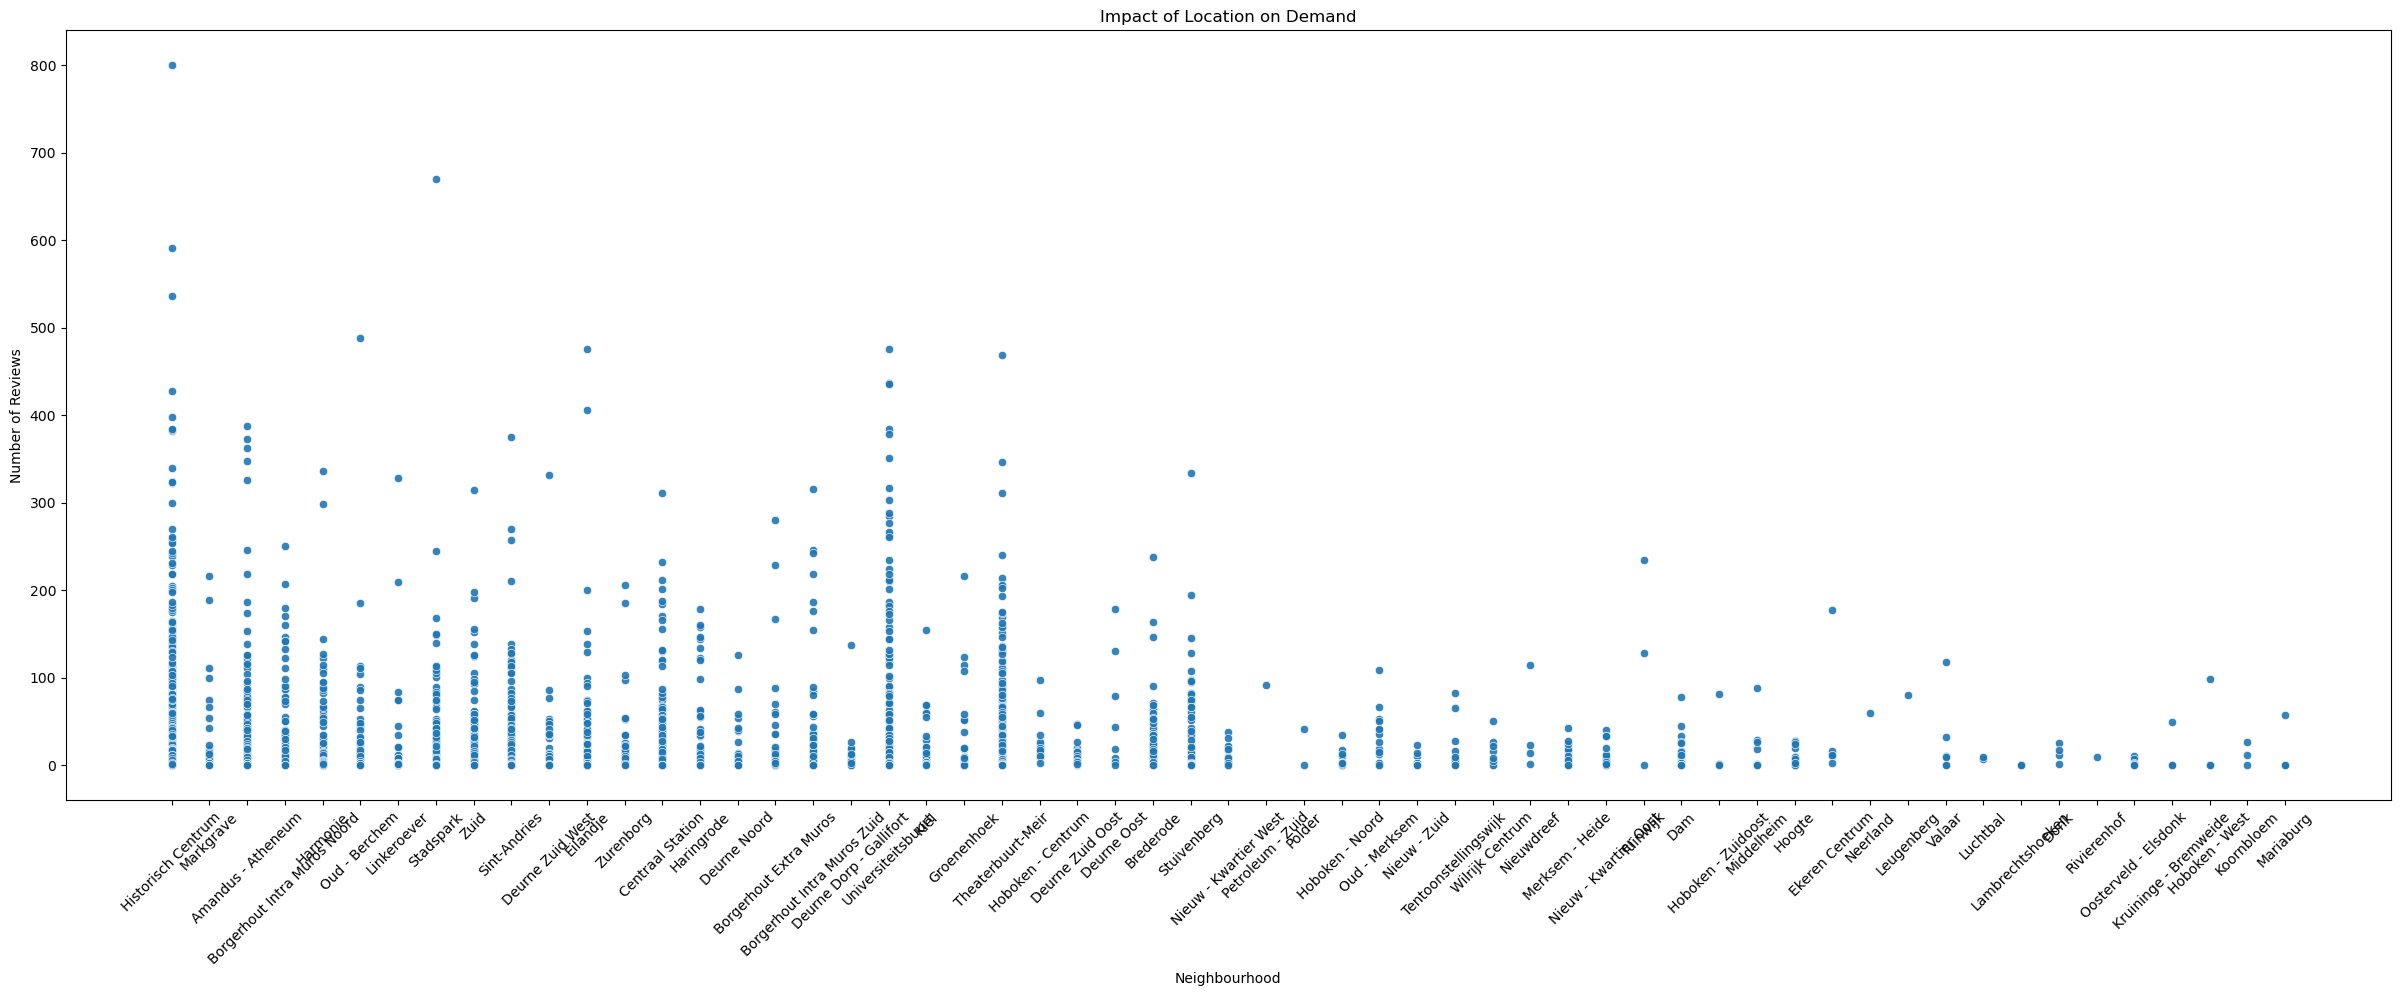

In [166]:
# Explore the impact of location (neighbourhood) on demand (number of reviews)
plt.figure(figsize=(30, 10))
sns.scatterplot(x='neighbourhood', y='number_of_reviews', data=airbnb_df ,alpha=0.9)
plt.title('Impact of Location on Demand')
plt.xlabel('Neighbourhood')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.show()

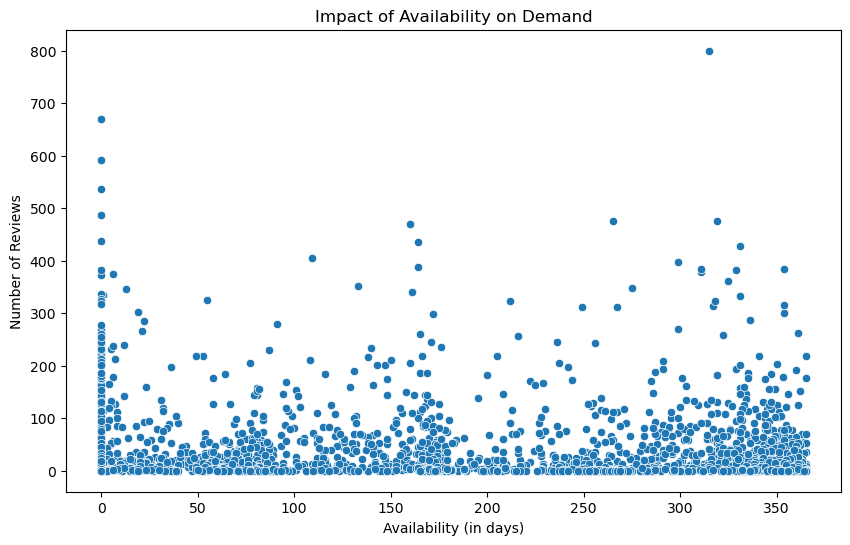

In [167]:
# Explore the impact of availability on demand (number of reviews)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='availability_365', y='number_of_reviews', data=airbnb_df)
plt.title('Impact of Availability on Demand')
plt.xlabel('Availability (in days)')
plt.ylabel('Number of Reviews')
plt.show()

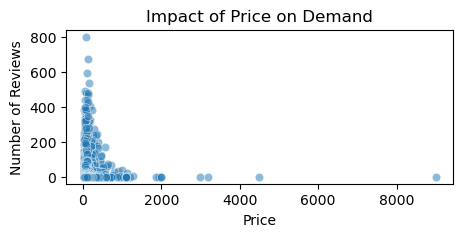

In [181]:

# Explore the impact of price on demand (number of reviews)
plt.figure(figsize=(5, 2))
sns.scatterplot(x='price', y='number_of_reviews', data=airbnb_df, alpha=0.5)
plt.title('Impact of Price on Demand')
plt.xlabel('Price')
plt.ylabel('Number of Reviews')
plt.show()


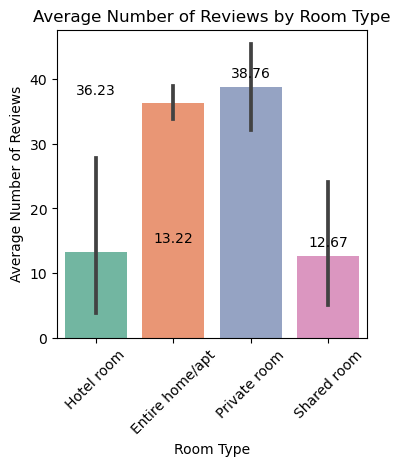

In [186]:
# Create a bar plot of average number of reviews for each room type
plt.figure(figsize=(4, 4))
sns.barplot(x='room_type', y='number_of_reviews', data=airbnb_df, palette='Set2')
plt.title('Average Number of Reviews by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Number of Reviews')
plt.xticks(rotation=45)


# Add annotations with average number of reviews
for index, value in enumerate(airbnb_df.groupby('room_type')['number_of_reviews'].mean().round(2)):
    plt.text(index, value + 1, str(value), ha='center', va='bottom')